In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr

In [5]:
# Fetch S&P 500 data from 1985 onward
sp500 = yf.download('^GSPC', start='1985-01-01')
sp500_close = sp500['Close'].squeeze()  # Convert to Series
print(f"S&P 500 data from {sp500_close.index[0]} to {sp500_close.index[-1]}")
sp500_close.head()

[*********************100%***********************]  1 of 1 completed

S&P 500 data from 1985-01-02 00:00:00 to 2026-02-12 00:00:00


Date
1985-01-02    165.369995
1985-01-03    164.570007
1985-01-04    163.679993
1985-01-07    164.240005
1985-01-08    163.990005
Name: ^GSPC, dtype: float64

In [3]:
# Fetch US Federal Funds Rate (key interest rate) from FRED
try:
    interest_rate = pdr.get_data_fred('DFF', start='1985-01-01')
    print(f"Federal Funds Rate data from {interest_rate.index[0]} to {interest_rate.index[-1]}")
    interest_rate.head()
except Exception as e:
    print(f"Error fetching from FRED: {e}")
    print("You may need to install pandas_datareader: pip install pandas-datareader")

Federal Funds Rate data from 1985-01-01 00:00:00 to 2026-02-11 00:00:00


In [7]:
# Combine the data and align dates
combined_df = pd.DataFrame({
    'SP500': sp500_close,
    'Interest_Rate': interest_rate['DFF']
})

# Forward fill to handle missing data, then drop any remaining NaN at the start
combined_df = combined_df.ffill().dropna()

# Normalize both series to 100 (first value = 100)
sp500_normalized = (combined_df['SP500'] / combined_df['SP500'].iloc[0]) * 100
interest_rate_normalized = (combined_df['Interest_Rate'] / combined_df['Interest_Rate'].iloc[0]) * 100

print(f"Data range: {combined_df.index[0]} to {combined_df.index[-1]}")
print(f"S&P 500 first value: {combined_df['SP500'].iloc[0]:.2f}")
print(f"Interest Rate first value: {combined_df['Interest_Rate'].iloc[0]:.2f}%")

Data range: 1985-01-02 00:00:00 to 2026-02-12 00:00:00
S&P 500 first value: 165.37
Interest Rate first value: 9.37%


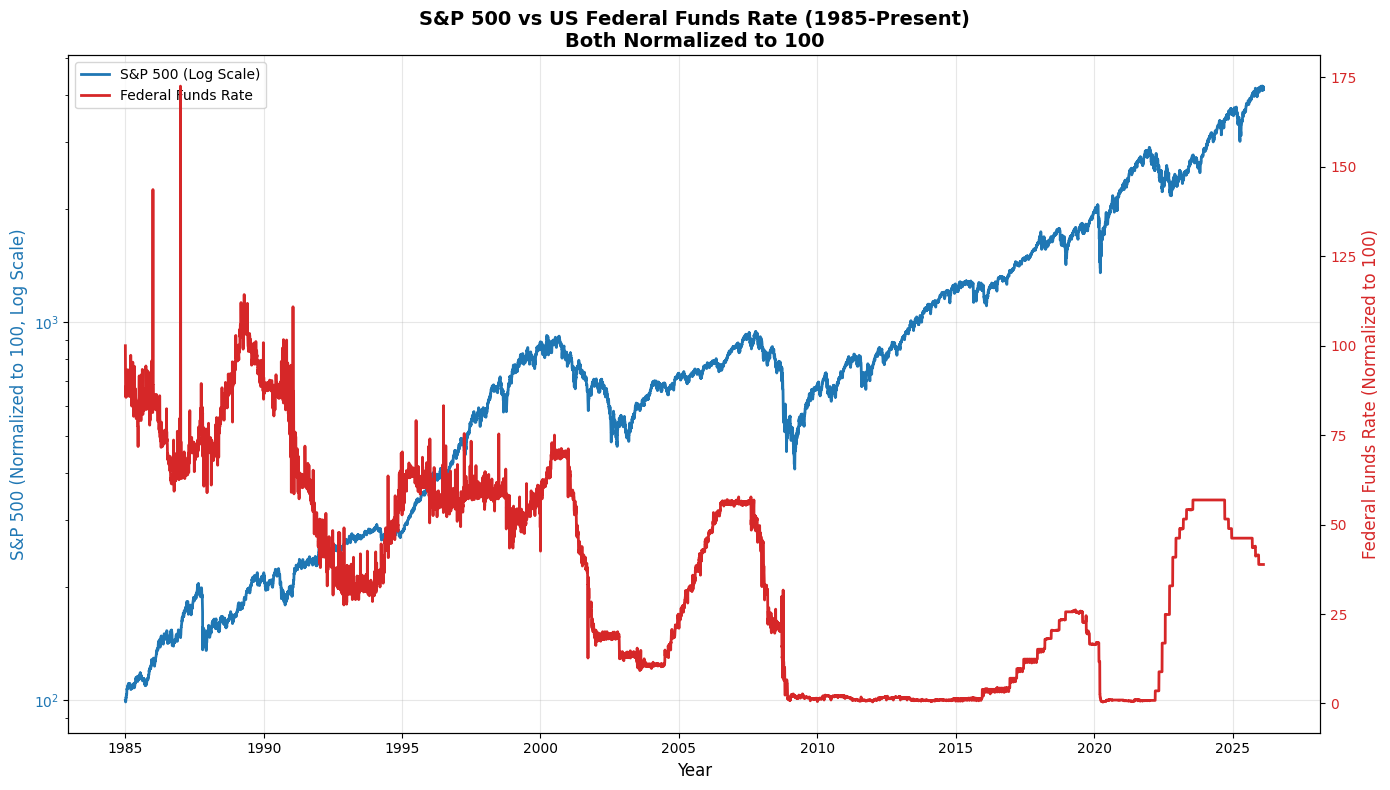

In [8]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot S&P 500 on logarithmic scale (normalized to 100)
color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('S&P 500 (Normalized to 100, Log Scale)', color=color, fontsize=12)
ax1.semilogy(sp500_normalized.index, sp500_normalized, color=color, linewidth=2, label='S&P 500 (Log Scale)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Create second y-axis for interest rates
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Federal Funds Rate (Normalized to 100)', color=color, fontsize=12)
ax2.plot(interest_rate_normalized.index, interest_rate_normalized, color=color, linewidth=2, label='Federal Funds Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('S&P 500 vs US Federal Funds Rate (1985-Present)\nBoth Normalized to 100', fontsize=14, fontweight='bold')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

In [12]:
# Fetch Nominal GDP from FRED
gdp = pdr.get_data_fred('GDP', start='1985-01-01')
print(f"GDP data from {gdp.index[0]} to {gdp.index[-1]}")
gdp.head()

GDP data from 1985-01-01 00:00:00 to 2025-07-01 00:00:00


,GDP
DATE,
1985-01-01,4230.168
1985-04-01,4294.887
1985-07-01,4386.773
1985-10-01,4444.094
1986-01-01,4507.894


In [15]:
# Normalize GDP to 100 at beginning of 1985
gdp_series = gdp['GDP']
gdp_normalized = (gdp_series / gdp_series.iloc[0]) * 100

print(f"GDP normalized to 100 at {gdp_series.index[0]}")
print(f"GDP first value: ${gdp_series.iloc[0]:.2f} billion")
print(f"GDP last value: ${gdp_series.iloc[-1]:.2f} billion")

GDP normalized to 100 at 1985-01-01 00:00:00
GDP first value: $4230.17 billion
GDP last value: $31098.03 billion


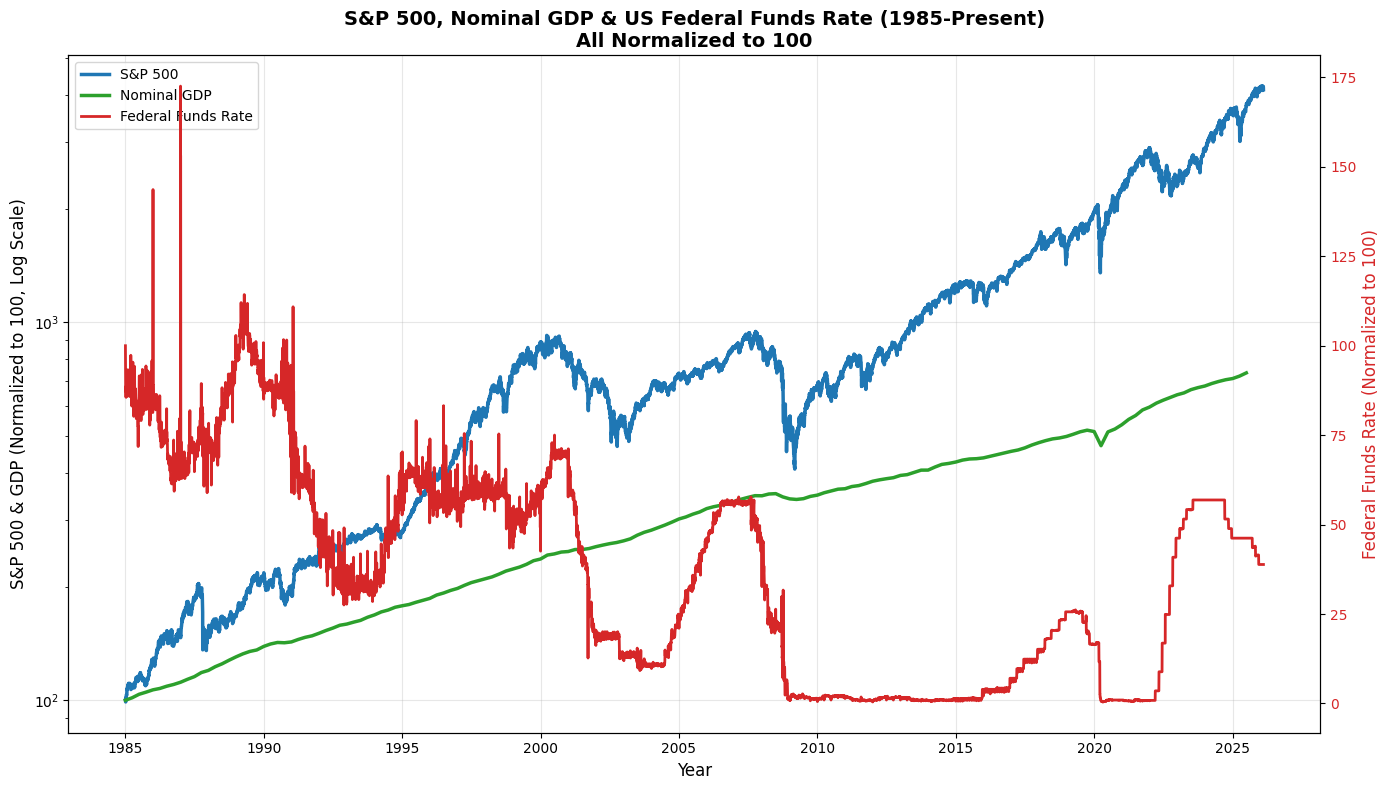

In [16]:
# Create combined plot with S&P 500, GDP, and Interest Rates
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot S&P 500 on logarithmic scale (normalized to 100)
color_sp500 = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('S&P 500 & GDP (Normalized to 100, Log Scale)', fontsize=12)
ax1.semilogy(sp500_normalized.index, sp500_normalized, color=color_sp500, linewidth=2.5, label='S&P 500')
ax1.tick_params(axis='y')
ax1.grid(True, alpha=0.3)

# Plot GDP on the same logarithmic scale
color_gdp = 'tab:green'
ax1.semilogy(gdp_normalized.index, gdp_normalized, color=color_gdp, linewidth=2.5, label='Nominal GDP')

# Create second y-axis for interest rates
ax2 = ax1.twinx()
color_rate = 'tab:red'
ax2.set_ylabel('Federal Funds Rate (Normalized to 100)', color=color_rate, fontsize=12)
ax2.plot(interest_rate_normalized.index, interest_rate_normalized, color=color_rate, linewidth=2, label='Federal Funds Rate')
ax2.tick_params(axis='y', labelcolor=color_rate)

# Add title and legend
plt.title('S&P 500, Nominal GDP & US Federal Funds Rate (1985-Present)\nAll Normalized to 100', fontsize=14, fontweight='bold')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

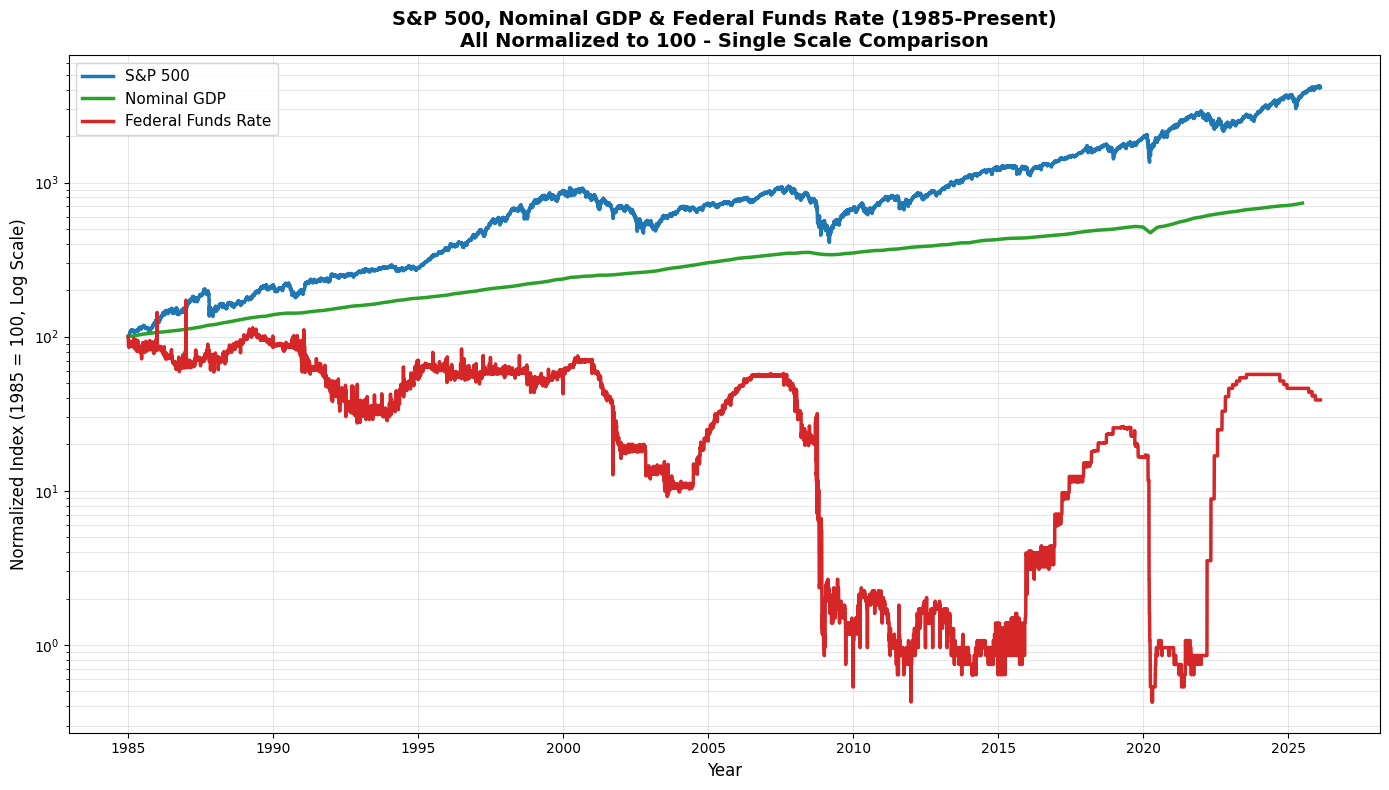

In [17]:
# Create single-scale plot with all three on same logarithmic axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot all three series on the same logarithmic scale
ax.semilogy(sp500_normalized.index, sp500_normalized, color='tab:blue', linewidth=2.5, label='S&P 500')
ax.semilogy(gdp_normalized.index, gdp_normalized, color='tab:green', linewidth=2.5, label='Nominal GDP')
ax.plot(interest_rate_normalized.index, interest_rate_normalized, color='tab:red', linewidth=2.5, label='Federal Funds Rate')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Normalized Index (1985 = 100, Log Scale)', fontsize=12)
ax.set_title('S&P 500, Nominal GDP & Federal Funds Rate (1985-Present)\nAll Normalized to 100 - Single Scale Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

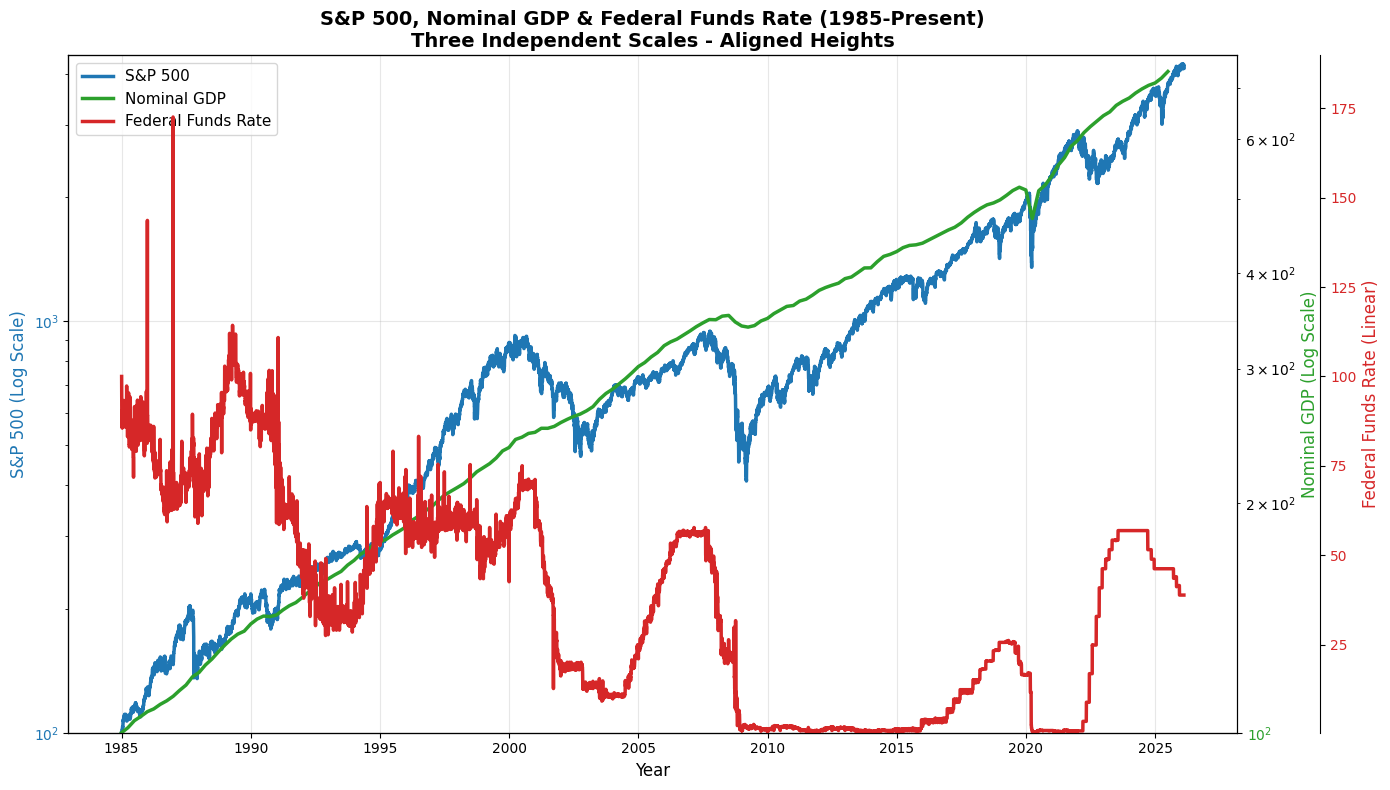

In [18]:
# Create plot with three separate scales but aligned heights
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot S&P 500 on first logarithmic scale (left axis)
color_sp500 = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('S&P 500 (Log Scale)', color=color_sp500, fontsize=12)
line1 = ax1.semilogy(sp500_normalized.index, sp500_normalized, color=color_sp500, linewidth=2.5, label='S&P 500')
ax1.tick_params(axis='y', labelcolor=color_sp500)
ax1.grid(True, alpha=0.3)

# Create second y-axis for GDP (logarithmic, positioned on the right)
ax2 = ax1.twinx()
color_gdp = 'tab:green'
ax2.set_ylabel('Nominal GDP (Log Scale)', color=color_gdp, fontsize=12)
line2 = ax2.semilogy(gdp_normalized.index, gdp_normalized, color=color_gdp, linewidth=2.5, label='Nominal GDP')
ax2.tick_params(axis='y', labelcolor=color_gdp)

# Align the y-axis limits so both start at 100 and end at their respective max values
sp500_min, sp500_max = sp500_normalized.min(), sp500_normalized.max()
gdp_min, gdp_max = gdp_normalized.min(), gdp_normalized.max()

# Set both axes to start at 100 and end at their respective max values
ax1.set_ylim([100, sp500_max * 1.05])
ax2.set_ylim([100, gdp_max * 1.05])

# Create third y-axis for interest rates (linear, offset to the right)
ax3 = ax1.twinx()
# Offset the third axis to the right
ax3.spines['right'].set_position(('outward', 60))
color_rate = 'tab:red'
ax3.set_ylabel('Federal Funds Rate (Linear)', color=color_rate, fontsize=12)
line3 = ax3.plot(interest_rate_normalized.index, interest_rate_normalized, color=color_rate, linewidth=2.5, label='Federal Funds Rate')
ax3.tick_params(axis='y', labelcolor=color_rate)

# Set interest rate axis to also visually align
rate_min, rate_max = interest_rate_normalized.min(), interest_rate_normalized.max()
ax3.set_ylim([rate_min * 0.8, rate_max * 1.1])

# Add title
plt.title('S&P 500, Nominal GDP & Federal Funds Rate (1985-Present)\nThree Independent Scales - Aligned Heights', fontsize=14, fontweight='bold')

# Combine legends
lines = [line1[0], line2[0], line3[0]]
labels = ['S&P 500', 'Nominal GDP', 'Federal Funds Rate']
ax1.legend(lines, labels, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()